## 1. Dados e visualizações

**Importando os dados e visualizando os dados:**

In [1]:
import pandas as pd

notas = pd.read_csv('dados/curso1/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Checando o tamanho do DataFrame:**

In [4]:
print(f'Temos {notas.shape[0]} linhas e {notas.shape[1]} colunas no nosso DataFrame')

Temos 100836 linhas e 4 colunas no nosso DataFrame


**Traduzindo o nome das colunas:**

In [8]:
notas.columns = ['usuarioID', 'filmeID', 'nota','momento']

In [9]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Descobrindo os valores possíveis de notas:**

In [12]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

As notas variam entre 0.5 até 5.0 !

**Descobrindo quantas vezes apareceu cada nota:**

In [14]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

**Descobrindo a média de todas as notas:**

In [17]:
print('A média de notas é: ', round(notas['nota'].mean(),2))

A média de notas é:  3.5


**Explorando as notas de maneira visual:**

<AxesSubplot: ylabel='Frequency'>

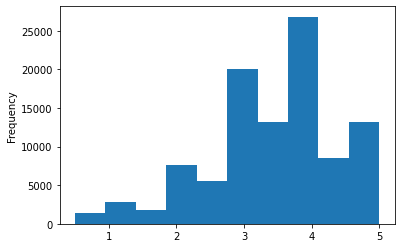

In [26]:
notas['nota'].plot(kind='hist')

**Explorando a mediana do dataset:**

In [28]:
print('A mediana é: ', notas['nota'].median())

A mediana é:  3.5


**Obtendo diversas medidas de descrição do dataset:**

In [29]:
notas.describe()

,usuarioID,filmeID,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Importando a biblioteca Seaborn e plotando um boxplot do nosso dataset:**

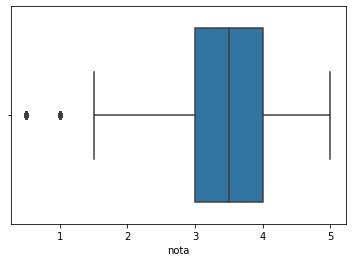

In [35]:
import seaborn as sns

sns.boxplot(x = notas['nota']);